# Capstone Project - Google Predictive Analytics

## Part_5: Modeling 

### Performs some more EDA and Modeling

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../kaggle_data/df_combined_tables.csv")

C:\Users\install\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,deviceCategory,isMobile,...,isTrueDirect,keyword,medium,referralPath,source,bounces,hits,newVisits,pageviews,transactionRevenue
0,Organic Search,1970-01-01 00:00:00.020160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,...,-999,(not provided),organic,-999,google,1,1,1,1,0.0
1,Organic Search,1970-01-01 00:00:00.020160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,...,-999,(not provided),organic,-999,google,1,1,1,1,0.0
2,Organic Search,1970-01-01 00:00:00.020160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,...,-999,(not provided),organic,-999,google,1,1,1,1,0.0
3,Organic Search,1970-01-01 00:00:00.020160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,...,-999,google + online,organic,-999,google,1,1,1,1,0.0
4,Organic Search,1970-01-01 00:00:00.020160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,...,True,(not provided),organic,-999,google,1,1,0,1,0.0


In [4]:
df.describe()

,visitId,visitNumber,visitStartTime,bounces,hits,newVisits,pageviews,transactionRevenue
count,9.036530e+05,903653.000000,9.036530e+05,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,1.485007e+09,2.264897,1.485007e+09,0.498676,4.596538,0.778020,3.849338,1.704273
std,9.022124e+06,9.283735,9.022124e+06,0.499999,9.641437,0.415578,7.025002,52.778659
min,1.470035e+09,1.000000,1.470035e+09,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.477561e+09,1.000000,1.477561e+09,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.483949e+09,1.000000,1.483949e+09,0.000000,2.000000,1.000000,1.000000,0.000000
75%,1.492759e+09,1.000000,1.492759e+09,1.000000,4.000000,1.000000,4.000000,0.000000
max,1.501657e+09,395.000000,1.501657e+09,1.000000,500.000000,1.000000,469.000000,23129.500000


In [5]:
df.corr()

,visitId,visitNumber,visitStartTime,isMobile,bounces,hits,newVisits,pageviews,transactionRevenue
visitId,1.000000,0.002069,1.000000,0.144332,-0.000131,-0.027701,-0.041035,-0.022262,0.002724
visitNumber,0.002069,1.000000,0.002069,-0.037667,-0.023754,0.041317,-0.255077,0.043332,0.051366
visitStartTime,1.000000,0.002069,1.000000,0.144332,-0.000131,-0.027701,-0.041035,-0.022262,0.002724
isMobile,0.144332,-0.037667,0.144332,1.000000,0.021394,-0.030367,0.021656,-0.030180,-0.016555
bounces,-0.000131,-0.023754,-0.000131,0.021394,1.000000,-0.371136,0.078841,-0.404527,-0.032206
hits,-0.027701,0.041317,-0.027701,-0.030367,-0.371136,1.000000,-0.115202,0.983201,0.154333
newVisits,-0.041035,-0.255077,-0.041035,0.021656,0.078841,-0.115202,1.000000,-0.117150,-0.041164
pageviews,-0.022262,0.043332,-0.022262,-0.030180,-0.404527,0.983201,-0.117150,1.000000,0.155589
transactionRevenue,0.002724,0.051366,0.002724,-0.016555,-0.032206,0.154333,-0.041164,0.155589,1.000000


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [8]:
# sns.heatmap(X_train[df_numbers_corr].corr(), vmin=-1, vmax=1);

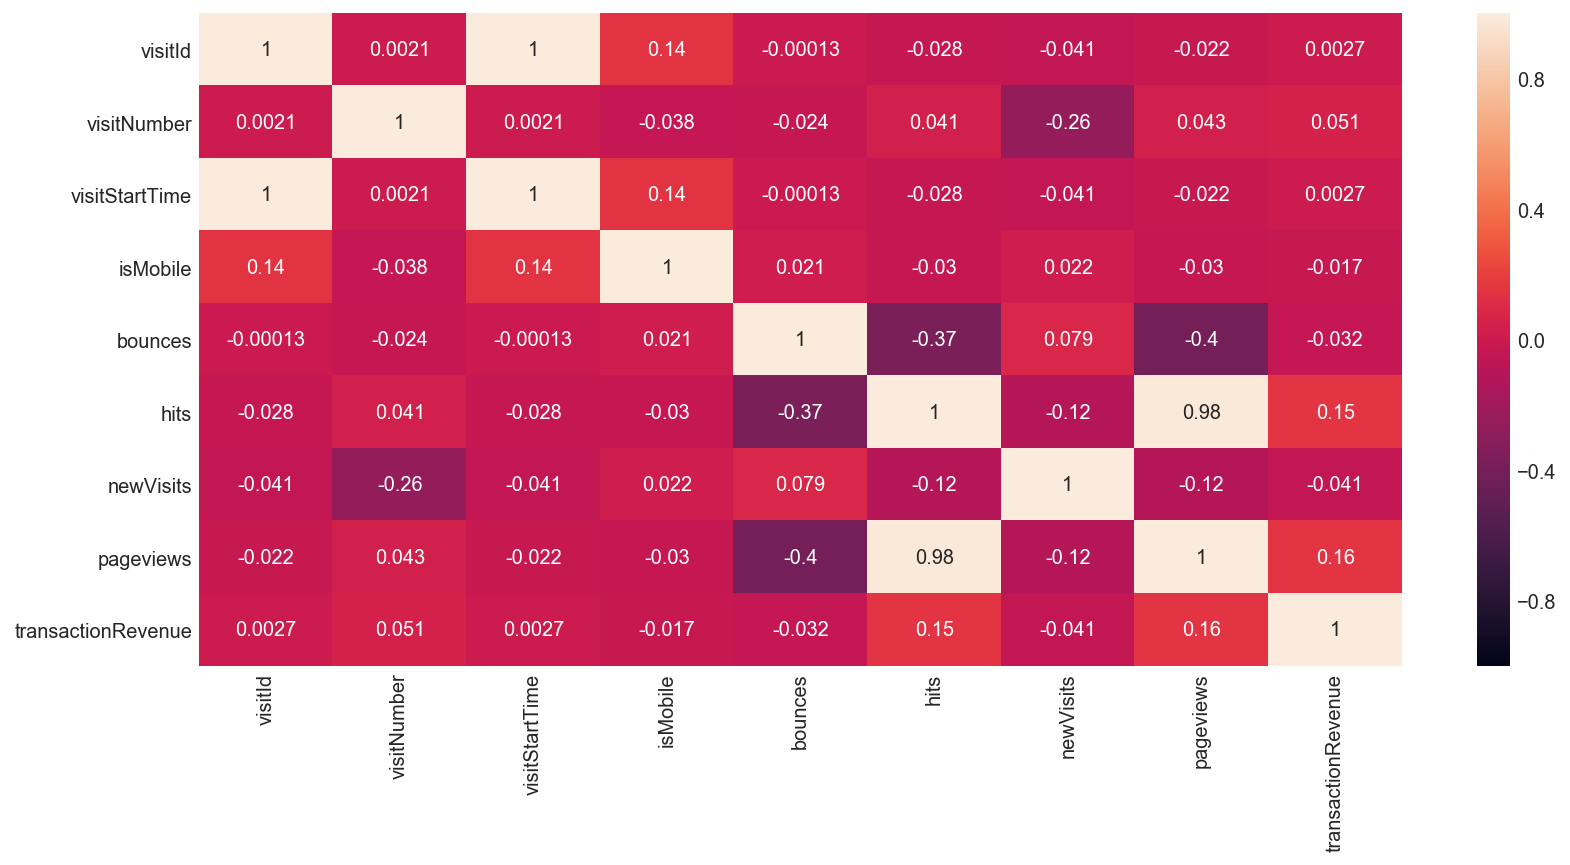

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

>From the correlation heatmap, we see that transactionRevenue has a strong correlation with hits and pageviews, howerver, pageviews has a much stronger correlation with hits. 

#### Creating a basic model using only the numerical values of df.

In [11]:
X.corrwith(y).sort_values(ascending = False)

pageviews         0.155589
hits              0.154333
visitNumber       0.051366
visitStartTime    0.002724
visitId           0.002724
isMobile         -0.016555
bounces          -0.032206
newVisits        -0.041164
dtype: float64

In [10]:
y = df['transactionRevenue']
X = df.drop(['transactionRevenue'], axis=1)

In [19]:
X_numeric = X._get_numeric_data()

#### Train_test_split and model with Linear Regression

In [47]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [39]:
ss = StandardScaler()
ss.fit(X_numeric)

X_s = ss.transform(X_numeric)

X_s

array([[-1.34967236, -0.13624881, -1.34967245, ..., -0.37302941,
         0.5341481 , -0.40559985],
       [-1.34415681, -0.13624881, -1.3441569 , ..., -0.37302941,
         0.5341481 , -0.40559985],
       [-1.3457929 , -0.13624881, -1.34579299, ..., -0.37302941,
         0.5341481 , -0.40559985],
       ...,
       [-0.16413607, -0.13624881, -0.16413618, ...,  2.01250841,
         0.5341481 ,  2.44137601],
       [-0.15677383, -0.13624881, -0.15677316, ...,  2.01250841,
         0.5341481 ,  2.58372481],
       [-0.15881138, -0.13624881, -0.15881148, ...,  2.73854166,
         0.5341481 ,  3.86486395]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state=42)

In [41]:
# X_train.corrwith(y_train).sort_values()

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.027212806132741907, 0.02933665664092233)

In [38]:
# pipe = Pipeline([
#     #('pf', PolynomialFeatures()),
#     ('ss', StandardScaler()),
#     ('lr', LinearRegression())
# ])

# pipe.fit(X_train, y_train)

# print(pipe.score(X_train, y_train))
# print(pipe.score(X_test, y_test))

0.027212806132742018
0.029336656640922776


##### Using Ridge and lasso regressing

In [48]:
rcv = RidgeCV(alphas=np.logspace(0, 5,200), cv = 10)

In [ ]:
rcv.fit(X_s, y)